
# Sharpe-Ratio Monte Carlo Demo
Run a small, deterministic Monte Carlo over the default DGP grid and visualize RMSE across methods.


In [12]:

# Ensure project root on sys.path so `from src import sharpe_mc` works
import sys
from pathlib import Path

cwd = Path.cwd().resolve()
for path in [cwd, *cwd.parents]:
    if (path / "src" / "sharpe_mc.py").exists():
        if str(path) not in sys.path:
            sys.path.insert(0, str(path))
        break


In [13]:

import pandas as pd
import matplotlib.pyplot as plt
from src import sharpe_mc

plt.style.use('ggplot')


In [14]:

# Experiment settings (keep reps modest for a quick notebook run)
REPS = 50000
SEED = 0
MAX_WORKERS = 4  # set to 1 to run single-process


In [ ]:

rows = sharpe_mc.run_experiment(
    reps=REPS,
    seed=SEED,
    max_workers=MAX_WORKERS,
    run_sanity=False,  # skip heavy long-run check for the demo
)


In [ ]:
df = pd.DataFrame(rows)
df

,dgp,n,S_true,method,bias,rmse,coverage_95,reject_rate_H0_S_le_0,se_ratio,psr_reject_rate,dsr_reject_rate
0,iid_normal,120,0.0,naive_asymptotic,0.006014,0.092200,0.949,0.058,0.993812,0.054,0.002
1,iid_normal,120,0.0,robust_hac,0.006014,0.092200,0.944,0.067,0.968782,0.054,0.002
2,iid_normal,120,0.0,psr,0.006014,0.092200,0.949,0.054,0.993812,0.054,0.002
3,iid_normal,120,0.0,dsr,0.006014,0.092200,0.949,0.002,0.993812,0.054,0.002
4,iid_normal,120,0.5,naive_asymptotic,0.000659,0.096900,0.957,1.000,1.000732,1.000,0.978
...,...,...,...,...,...,...,...,...,...,...,...
91,garch11_t5,1200,0.0,dsr,0.001265,0.029210,0.949,0.000,0.988911,0.047,0.000
92,garch11_t5,1200,0.5,naive_asymptotic,0.003224,0.046891,0.816,1.000,0.654954,1.000,1.000
93,garch11_t5,1200,0.5,robust_hac,0.003224,0.046891,0.872,1.000,0.764055,1.000,1.000
94,garch11_t5,1200,0.5,psr,0.003224,0.046891,0.816,1.000,0.654954,1.000,1.000


In [ ]:

# Compact summary table
summary_cols = ["dgp", "n", "S_true", "method", "bias", "rmse", "coverage_95", "psr_reject_rate", "dsr_reject_rate"]
summary = df[summary_cols].sort_values(["dgp", "n", "S_true", "method"])
summary


,dgp,n,S_true,method,bias,rmse,coverage_95,psr_reject_rate,dsr_reject_rate
51,ar1_t5,120,0.0,dsr,-0.007565,0.126219,0.846,0.110,0.005
48,ar1_t5,120,0.0,naive_asymptotic,-0.007565,0.126219,0.846,0.110,0.005
50,ar1_t5,120,0.0,psr,-0.007565,0.126219,0.846,0.110,0.005
49,ar1_t5,120,0.0,robust_hac,-0.007565,0.126219,0.899,0.110,0.005
55,ar1_t5,120,0.5,dsr,0.014054,0.140785,0.837,0.994,0.865
...,...,...,...,...,...,...,...,...,...
41,iid_t5,1200,0.0,robust_hac,0.000284,0.029706,0.942,0.063,0.000
47,iid_t5,1200,0.5,dsr,0.000616,0.035496,0.907,1.000,1.000
44,iid_t5,1200,0.5,naive_asymptotic,0.000616,0.035496,0.907,1.000,1.000
46,iid_t5,1200,0.5,psr,0.000616,0.035496,0.907,1.000,1.000


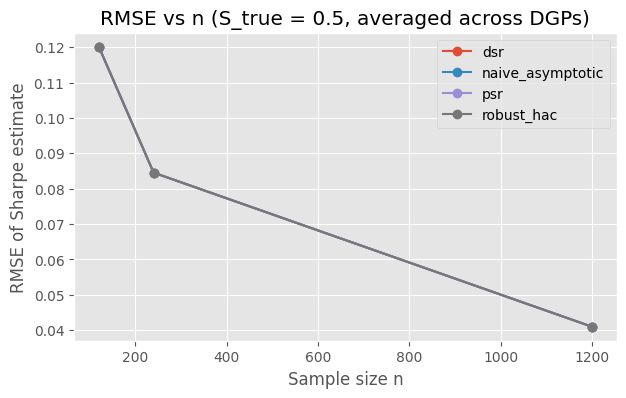

In [ ]:

# Plot: mean RMSE across DGPs for S_true = 0.5 by method and sample size
plot_df = df[df["S_true"] == 0.5]
avg_rmse = plot_df.groupby(["method", "n"])["rmse"].mean().reset_index()

fig, ax = plt.subplots(figsize=(7, 4))
for method, sub in avg_rmse.groupby("method"):
    ax.plot(sub["n"], sub["rmse"], marker="o", label=method)

ax.set_xlabel("Sample size n")
ax.set_ylabel("RMSE of Sharpe estimate")
ax.set_title("RMSE vs n (S_true = 0.5, averaged across DGPs)")
ax.legend()
plt.show()
